In [1]:
# Import necessary libraries
# import numpy as np
import pandas as pd

In [2]:
# Import dataset
df = pd.read_csv("Mall_Customers.csv")
df.drop(columns=["CustomerID"], axis=1, inplace=True)
df.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


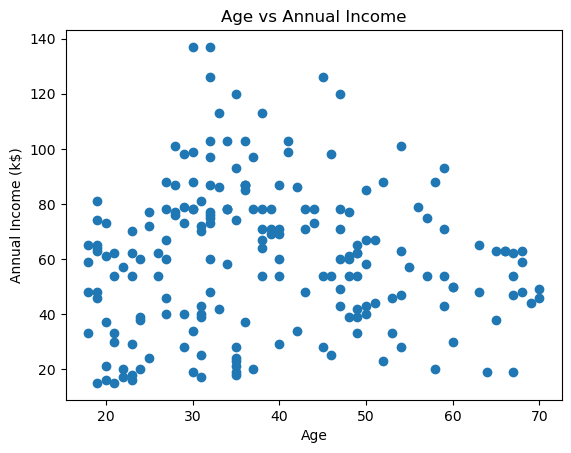

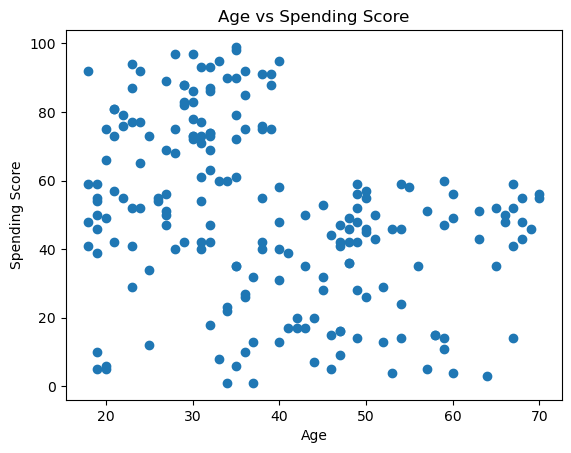

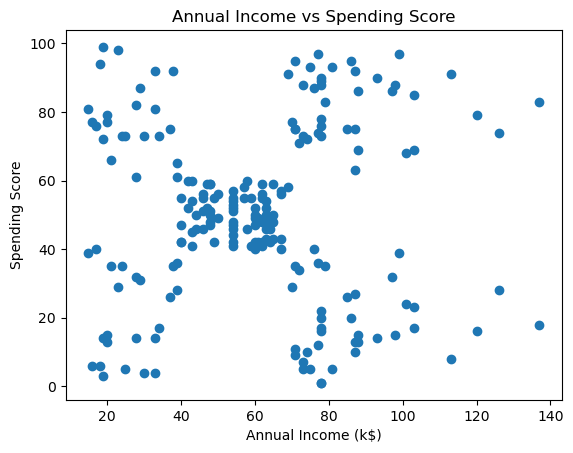

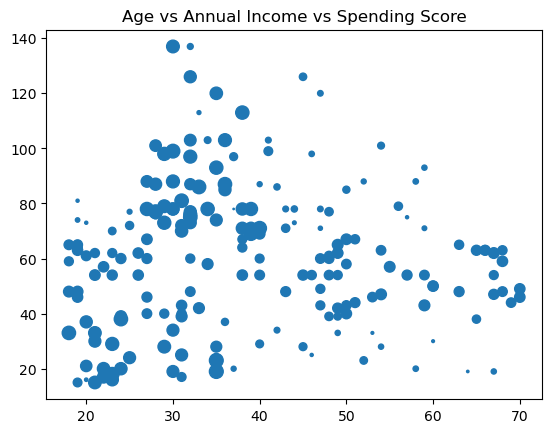

In [3]:
## Data Visualization (Scatter Plots)
import matplotlib.pyplot as plt

# Age vs Annual Income
plt.title("Age vs Annual Income")
plt.scatter(df["Age"], df["Annual_Income_(k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

# Age vs Spending Score
plt.title("Age vs Spending Score")
plt.scatter(df["Age"], df["Spending_Score"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

# Annual Income vs Spending Score
plt.title("Annual Income vs Spending Score")
plt.scatter(df["Annual_Income_(k$)"], df["Spending_Score"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

# All with Legends
plt.title("Age vs Annual Income vs Spending Score")
plt.scatter(df["Age"], df["Annual_Income_(k$)"], df["Spending_Score"])
plt.show()

In [4]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), [c for c in df.columns if df[c].dtype == "object"]),
                                      remainder='passthrough')
df = pd.DataFrame(transformer.fit_transform(df))
df.head(10)

,0,1,2,3,4
0,0.0,1.0,19.0,15.0,39.0
1,0.0,1.0,21.0,15.0,81.0
2,1.0,0.0,20.0,16.0,6.0
3,1.0,0.0,23.0,16.0,77.0
4,1.0,0.0,31.0,17.0,40.0
5,1.0,0.0,22.0,17.0,76.0
6,1.0,0.0,35.0,18.0,6.0
7,1.0,0.0,23.0,18.0,94.0
8,0.0,1.0,64.0,19.0,3.0
9,1.0,0.0,30.0,19.0,72.0


In [5]:
# Label Encoding
# from sklearn.preprocessing import LabelEncoder
#
# df = df.apply(LabelEncoder().fit_transform)
# df.head(10)

In [6]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.head(10)

,0,1,2,3,4
0,-1.128152,1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.886405,-0.563369,-1.662660,-0.395980
5,0.886405,-0.886405,-1.209269,-1.662660,1.001596
6,0.886405,-0.886405,-0.276302,-1.624491,-1.715913
7,0.886405,-0.886405,-1.137502,-1.624491,1.700384
8,-1.128152,1.128152,1.804932,-1.586321,-1.832378
9,0.886405,-0.886405,-0.635135,-1.586321,0.846310


In [7]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.16, min_samples=4)
clusters = dbscan.fit_predict(df)
labels = dbscan.labels_

In [8]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters: ", n_clusters_)

Number of clusters:  2


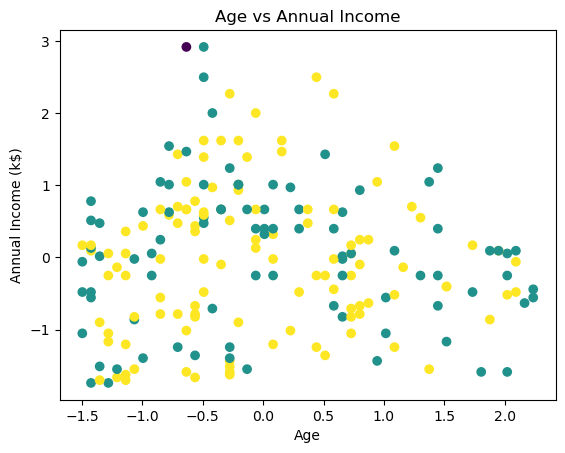

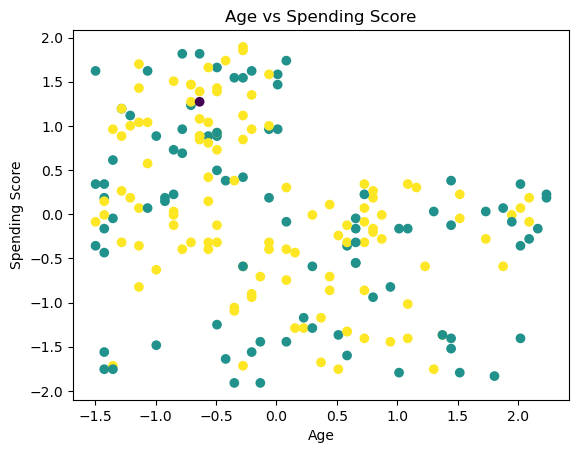

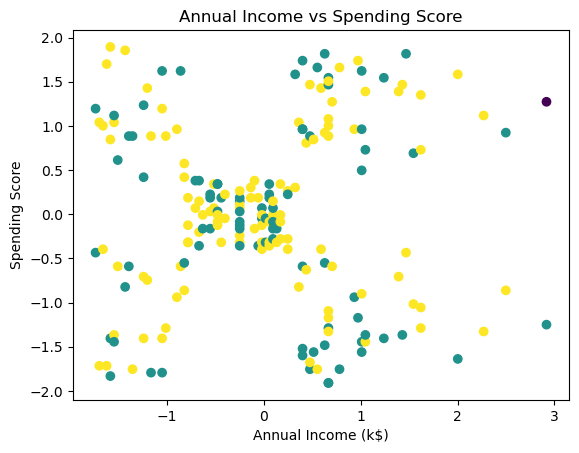

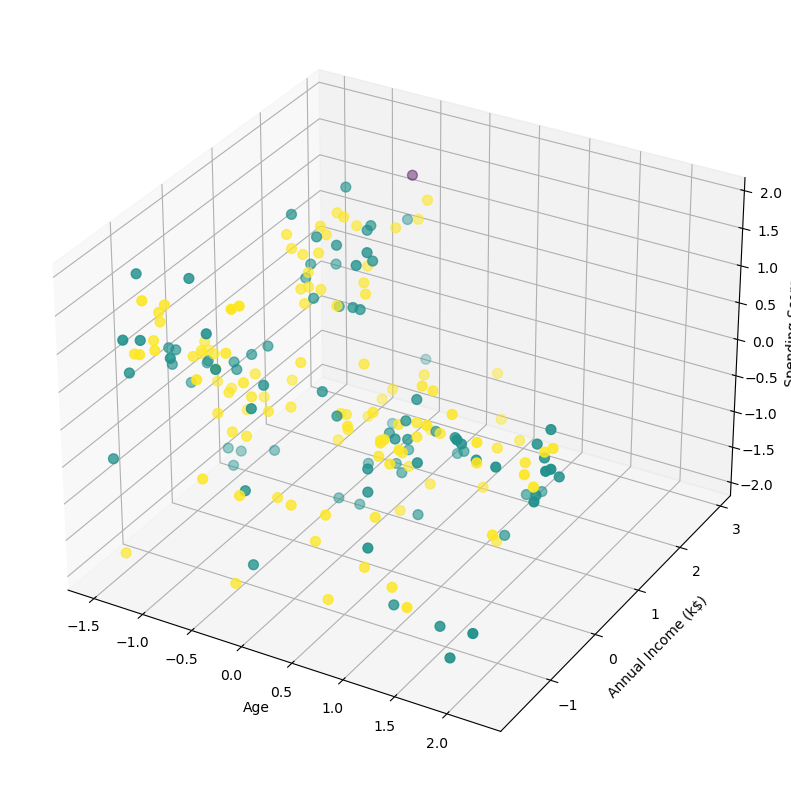

In [9]:
## Visualizing the clusters
# Age vs Annual Income
plt.title("Age vs Annual Income")
plt.scatter(df[2], df[3], c=clusters, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

# Age vs Spending Score
plt.title("Age vs Spending Score")
plt.scatter(df[2], df[4], c=clusters, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

# Annual Income vs Spending Score
plt.title("Annual Income vs Spending Score")
plt.scatter(df[3], df[4], c=clusters, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

# All with Legends
fig3d = plt.figure(figsize=(10, 10))
ax = fig3d.add_subplot(111, projection='3d')
ax.scatter(df[2], df[3], df[4], cmap='viridis', c=clusters, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.show()

In [10]:
# Silhouette Score
from sklearn.metrics import silhouette_score

print("Silhouette Score: ", silhouette_score(df, labels))

Silhouette Score:  0.3412850463855064
